In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [13]:
uploaded = files.upload()


Saving heart.csv to heart (2).csv


In [14]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
# IT24102609 Feature Selection

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Separate features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

print("Shape before Feature Selection:", X.shape)

Shape before Feature Selection: (1025, 13)


In [17]:
# 1. Correlation with target (Quick Filter)

corr_with_target = df.corr()["target"].sort_values(ascending=False)
print("\nCorrelation of features with target:\n", corr_with_target)


Correlation of features with target:
 target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [18]:
# 2. SelectKBest (Chi-square test)

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

X = df.drop("target", axis=1)
y = df["target"]

# ANOVA F-test (works with negative values)
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features (ANOVA F-test):", selected_features)

Selected features (ANOVA F-test): Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


In [19]:
# 3. Model-based Feature Importance (RandomForest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature importance from RandomForest:")
print(importances)


Feature importance from RandomForest:
     Feature  Importance
2         cp    0.134201
7    thalach    0.120473
11        ca    0.116755
9    oldpeak    0.116151
12      thal    0.097043
0        age    0.089313
4       chol    0.078930
3   trestbps    0.074253
8      exang    0.059592
10     slope    0.048738
1        sex    0.036057
6    restecg    0.019619
5        fbs    0.008874


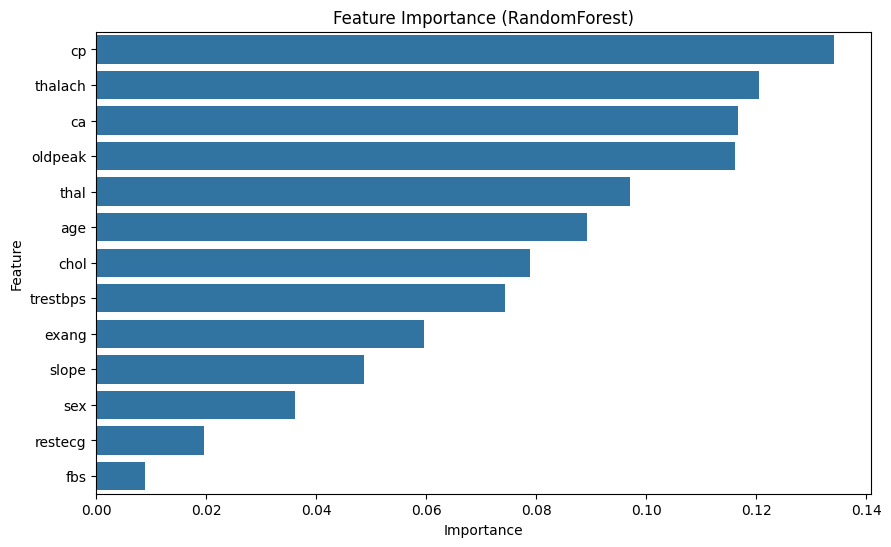

In [20]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Feature Importance (RandomForest)")
plt.show()